# <center> Travel Review Segmentation

- Abstract:

Understanding the tastes of each user and the characteristics of each
product is necessary to predict how a user will respond to a new product.
This latent user and product dimensions can be discovered with the help of
user feedback. A numeric rating and its accompanying text review is the
most widely available form of user feedback. A measure which
encapsulates the contents of such reviews is often necessary as they have
been found to significantly influence the shopping behaviour of users. A
fine-grained form of such measure that could act as perfect feedback about
the product is a star rating. The review rating prediction tries to predict a
rating corresponding to the given review.


- Problem Statement:
    
Given the google rating data, use a hierarchical clustering algorithm to
cluster reviews.

- Dataset Information:
    
This data set is populated by capturing user ratings from Google reviews.
Reviews on attractions from 24 categories across Europe are considered.
Google user rating ranges from 1 to 5 and the average user rating per
category is calculated.

- Variable Description:

| Column | Description |
|--------|-------------|
| User | Unique user id |
| Attribute 1 | Average ratings on churches |
| Attribute 2 | Average ratings on resorts |
| Attribute 3 | Average ratings on beaches | 
| Attribute 4 | Average ratings on parks |
| Attribute 5 | Average ratings on theatres |
| Attribute 6 | Average ratings on museums |
| Attribute 7 | Average ratings on malls |
| Attribute 8 | Average ratings on zoo |
| Attribute 9 |Average ratings on restaurants |
| Attribute 10 | Average ratings on pubs/bars |
| Attribute 11 | Average ratings on local services |
| Attribute 12 | Average ratings on burger/pizza shops |
| Attribute 13 | Average ratings on hotels/other lodgings |
| Attribute 14 | Average ratings on juice bars |
| Attribute 15 | Average ratings on art galleries |
| Attribute 16 | Average ratings on dance clubs |
| Attribute 17 | Average ratings on swimming pools |
| Attribute 18 | Average ratings on gyms |
| Attribute 19 | Average ratings on bakeries |
| Attribute 20 | Average ratings on beauty & spas |
| Attribute 21 | Average ratings on cafes |
| Attribute 22 | Average ratings on viewpoints |
| Attribute 23 | Average ratings on monuments |
| Attribute 24 | Average ratings on gardens |

Scope:
    
● Analyzing the existing data and getting valuable insights about the
review pattern
● Data pre-processing including missing value treatment
● Cluster the reviews based on the optimum number of clusters (‘k’)
with the help of dendrogram

## *Getting Data*

In [2]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pylab as pl
#pd.set_option('display.max_rows',None)

In [3]:
# Getting data using pd.read_csv
ratings = pd.read_csv('google_review_ratings.csv')

In [4]:
# First five rows
ratings.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [5]:
# Last five rows
ratings.tail()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN
5455,User 5456,0.95,4.07,5.00,2.82,2.80,2.57,2.42,1.02,1.74,...,0.64,0.62,0.63,0.78,5.00,1.08,5.0,5.0,1.17,NaN


In [6]:
# Dimensionality of dataframe
ratings.shape

(5456, 26)

In [7]:
# Number of elements
ratings.size

141856

In [8]:
# Summary of dataframe
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In this dataset we have total 26 columns and 5456 rows.

'Unnamed: 25' column have only two values.

'User' column have unique values representing User ID.

'Category 11' is an categorical column.

In [9]:
# Dropping 'Unnamed: 25'
ratings.drop('Unnamed: 25', axis=1, inplace=True)

In [10]:
# Statistical summary of datadrame
ratings.describe(include='all')

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
count,5456,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
unique,5456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,User 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,NaN,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,NaN,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,NaN,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,NaN,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000


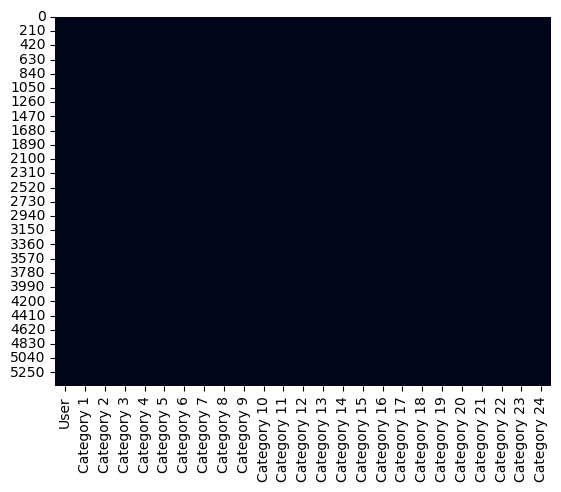

In [11]:
# Checking for missing values
sns.heatmap(ratings.isnull(), cbar=False)
plt.show()

In [12]:
# Dropping missing values
ratings.dropna(axis=0,inplace=True)

In [13]:
# Checking for duplicated values
ratings.duplicated().any()

False

In [14]:
# Changing the name of features

column_names = ['user_id', 'churches', 'resorts', 'beaches', 'parks', 
                'theatres', 'museums', 'malls', 'zoo', 'restaurants', 
                'pubs_bars', 'local_services', 'burger_pizza_shops', 
                'hotels_other_lodgings', 'juice_bars', 'art_galleries', 
                'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 
                'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']

ratings.columns = column_names   # assigning column names

In [16]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5454 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                5454 non-null   object 
 1   churches               5454 non-null   float64
 2   resorts                5454 non-null   float64
 3   beaches                5454 non-null   float64
 4   parks                  5454 non-null   float64
 5   theatres               5454 non-null   float64
 6   museums                5454 non-null   float64
 7   malls                  5454 non-null   float64
 8   zoo                    5454 non-null   float64
 9   restaurants            5454 non-null   float64
 10  pubs_bars              5454 non-null   float64
 11  local_services         5454 non-null   object 
 12  burger_pizza_shops     5454 non-null   float64
 13  hotels_other_lodgings  5454 non-null   float64
 14  juice_bars             5454 non-null   float64
 15  art_

In [19]:
# Unique values of series
ratings.local_services.unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

Here Local_services is numeric but represented as category, we will change datatye of Local_services.

In [21]:
# Changing datatype of local_services
ratings.local_services = ratings.local_services.astype('float')

### *Exploratory Data Analysis*

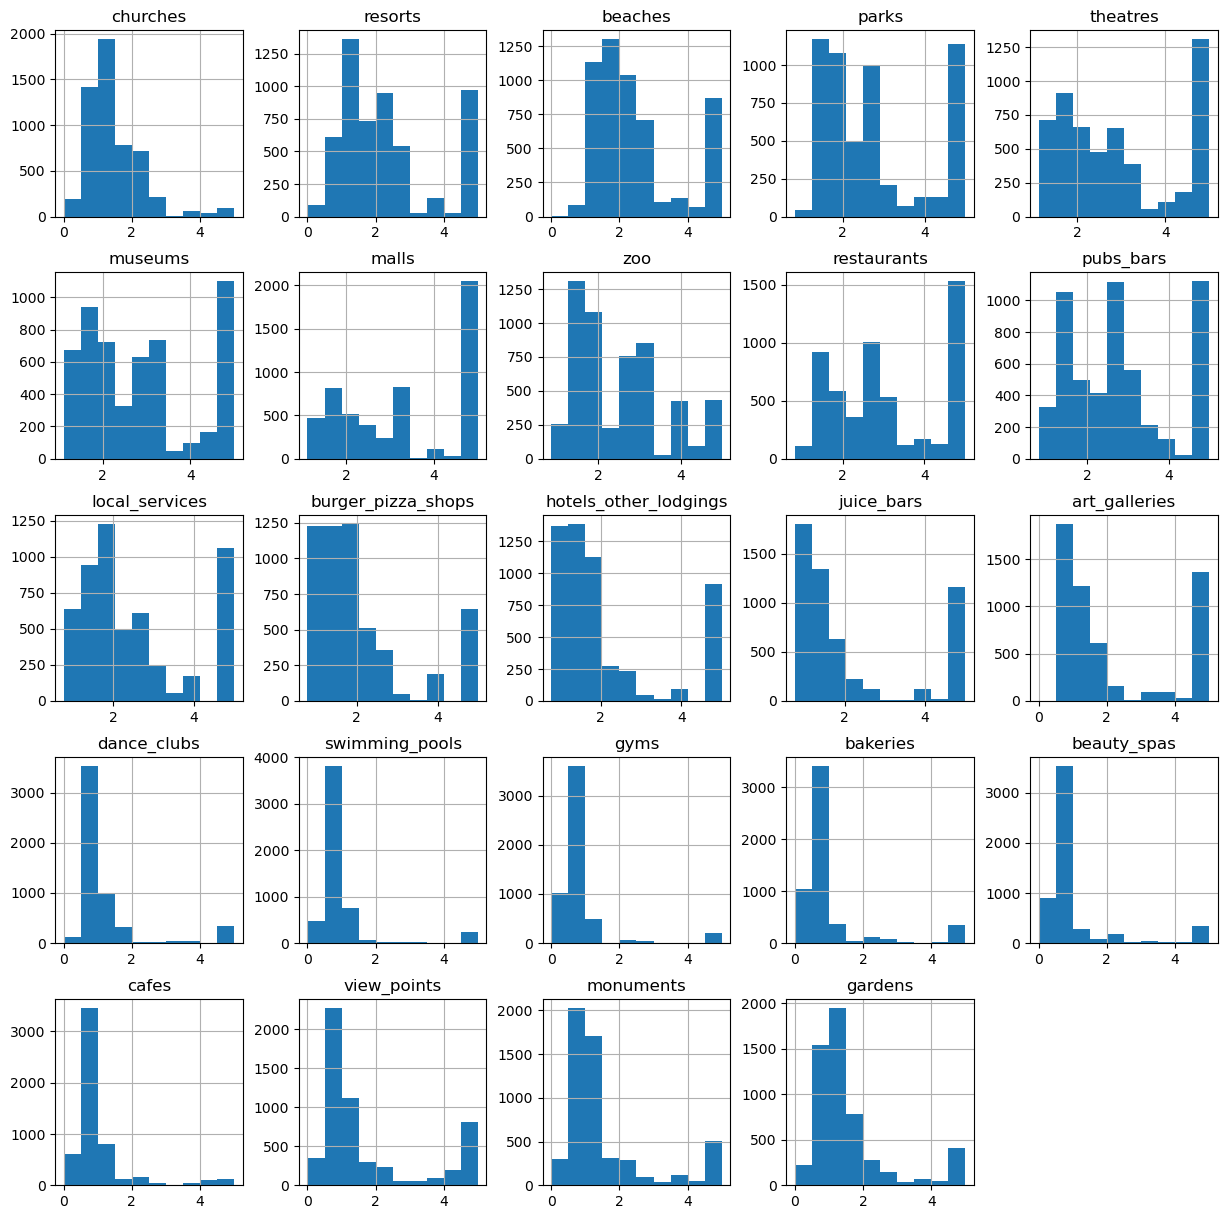

In [26]:
# Histogram of continuous variables
ratings.hist(figsize=(15,15))
plt.show()

In [32]:
# Finding the variables where all users have given ratings
ratings.describe().loc['min']>0

churches                 False
resorts                  False
beaches                  False
parks                     True
theatres                  True
museums                   True
malls                     True
zoo                       True
restaurants               True
pubs_bars                 True
local_services            True
burger_pizza_shops        True
hotels_other_lodgings     True
juice_bars                True
art_galleries            False
dance_clubs              False
swimming_pools           False
gyms                     False
bakeries                 False
beauty_spas              False
cafes                    False
view_points              False
monuments                False
gardens                  False
Name: min, dtype: bool

In [59]:
# Creating the dataframe containg number of review for each feature 
reviews = ratings.iloc[:, 1:].astype(bool).sum(axis=0).sort_values()
reviews

bakeries                 4409
gyms                     4438
beauty_spas              4559
cafes                    4851
swimming_pools           4976
view_points              5109
monuments                5152
gardens                  5229
churches                 5259
dance_clubs              5342
resorts                  5364
art_galleries            5450
beaches                  5450
pubs_bars                5454
local_services           5454
zoo                      5454
hotels_other_lodgings    5454
juice_bars               5454
malls                    5454
museums                  5454
theatres                 5454
parks                    5454
restaurants              5454
burger_pizza_shops       5454
dtype: int64

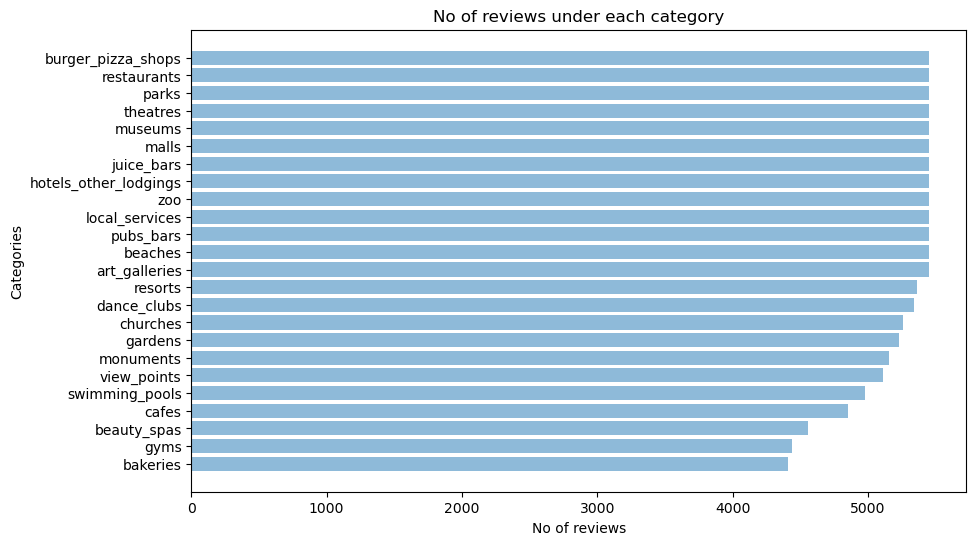

In [73]:
# Barplot of no. of reviews
plt.figure(figsize=(10,6))
plt.barh(np.arange(24), reviews.values, align='center', alpha=0.5)
plt.yticks(np.arange(24), reviews.index)
plt.xlabel('No of reviews')
plt.ylabel('Categories')
plt.title('No of reviews under each category')
plt.show()

In [78]:
# Creating a dataframe to store number of reviews by users
no_of_reviews = ratings.iloc[:,1:].astype(bool).sum(axis=1).value_counts()
no_of_reviews

24    3724
23     505
21     457
20     243
22     167
19     147
18     114
17      69
16      22
15       6
dtype: int64

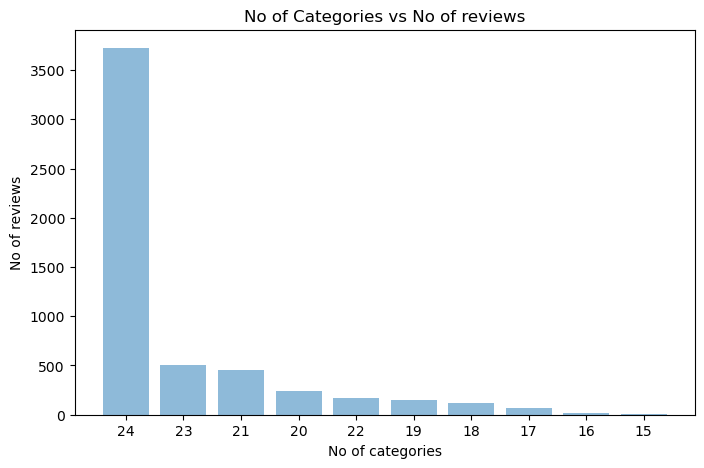

In [81]:
# Plotting the number of customers vs number of review
plt.figure(figsize=(8,5))
plt.bar(np.arange(len(no_of_reviews)), no_of_reviews.values, align='center', alpha=0.5)
plt.xticks(np.arange(len(no_of_reviews)), no_of_reviews.index)
plt.ylabel('No of reviews')
plt.xlabel('No of categories')
plt.title('No of Categories vs No of reviews')
plt.show()

Around 3500 users have given a rating for all the 24 categories and the least no of rating given by a user is 15.

In [82]:
# Creating a dataframe to store average rating for each feature
avg_rating = ratings.iloc[:,1:].mean() 
avg_rating = avg_rating.sort_values() 
avg_rating

gyms                     0.822525
swimming_pools           0.949349
cafes                    0.965275
bakeries                 0.969250
beauty_spas              0.999626
dance_clubs              1.192710
churches                 1.455746
monuments                1.531051
gardens                  1.560570
view_points              1.749345
burger_pizza_shops       2.078401
hotels_other_lodgings    2.125820
juice_bars               2.190429
art_galleries            2.206140
resorts                  2.320048
beaches                  2.489059
zoo                      2.541177
local_services           2.549622
parks                    2.797103
pubs_bars                2.832695
museums                  2.893423
theatres                 2.958904
restaurants              3.126542
malls                    3.351476
dtype: float64

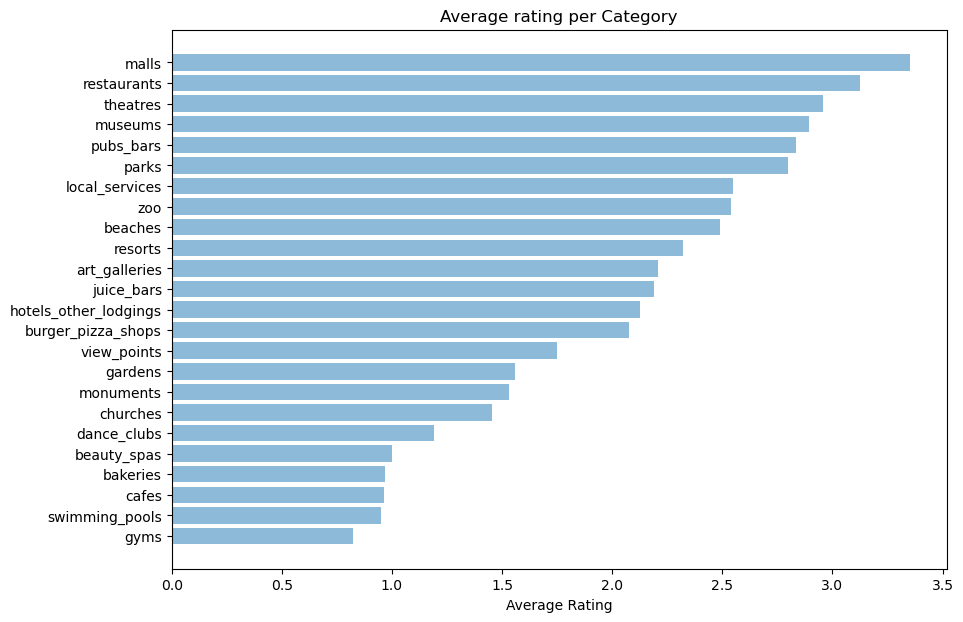

In [85]:
# Plotting average rating plots
plt.figure(figsize=(10,7))
plt.barh(np.arange(24), avg_rating.values, align='center', alpha=0.5)
plt.yticks(np.arange(24), avg_rating.index)
plt.xlabel('Average Rating')
plt.title('Average rating per Category')
plt.show()

In [87]:
# Creating new ID column
data = ratings.copy(deep=True)
new = data['user_id'].str.split(' ',n=2,expand=True)
data['id'] = new[1]
data = data.drop(['user_id'],axis=1)
data.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5


### *Hierarchical Clustering*

In [88]:
# Importing important libraries
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage

In [91]:
# Performing clustering
Z = sch.linkage(data.iloc[:,:-1],method='ward')
Z

array([[2.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.33800000e+03, 1.34600000e+03, 0.00000000e+00, 2.00000000e+00],
       [6.70000000e+02, 6.74000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.08890000e+04, 1.09020000e+04, 1.58239564e+02, 2.27800000e+03],
       [1.08990000e+04, 1.09030000e+04, 1.93567927e+02, 3.17600000e+03],
       [1.09040000e+04, 1.09050000e+04, 2.35708753e+02, 5.45400000e+03]])

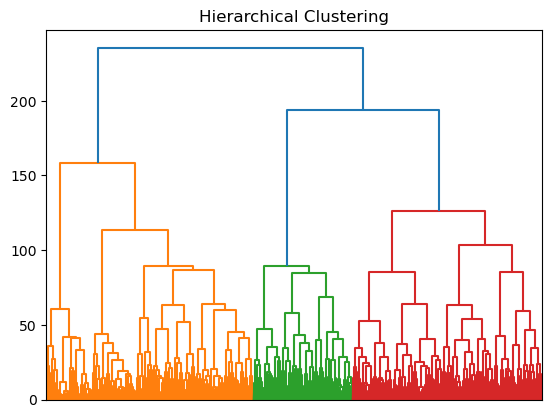

In [92]:
# Creating and plotting a dendogram
den = sch.dendrogram(Z)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 
plt.title('Hierarchical Clustering')
plt.show()

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. So we need to determine the cutting line.

In [93]:
# function to determine the cutting line
def fd(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

Observing the height of each dendrogram division we decided to go with 198 where the line would be drawn and 160 to determine the dendrogram nodes

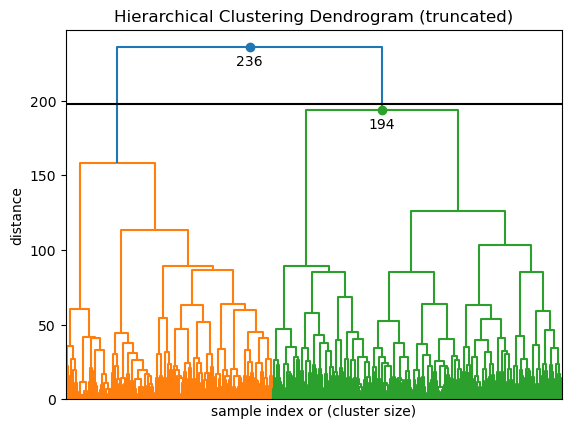

In [107]:
# Applying function
fd(Z,leaf_rotation=90.,show_contracted=True,annotate_above=160,max_d=198)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False)

**We can see that 2 clusters are possible**

In [108]:
# Creating a hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering 

In [109]:
# Creating a Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

In [110]:
# Fitting the model
y_cluster = hc.fit_predict(data.iloc[:,:-1])

In [111]:
# Adding cluster column
data["Cluster"] = y_cluster.astype('object')

In [112]:
data.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id,Cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2,0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3,0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4,0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5,0


In [120]:
# Seperating clusters
cluster_1 = data[data.Cluster==0]
cluster_2 = data[data.Cluster==1]
print('cluster_1',cluster_1.shape)
print('cluster_2',cluster_2.shape)

cluster_1 (3176, 26)
cluster_2 (2278, 26)


In cluster 1 we have 3176 records and In cluster 2 we have 2278 records.

In [121]:
cluster_1.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id,Cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2,0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3,0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4,0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5,0


In [122]:
cluster_2.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id,Cluster
40,0.54,0.57,0.67,3.71,5.00,2.95,2.94,2.59,1.66,2.27,...,0.54,0.00,0.0,0.00,0.50,0.00,0.51,0.54,41,1
56,0.69,0.69,0.72,5.00,3.83,2.96,2.94,5.00,2.89,2.16,...,0.63,0.00,0.0,0.00,0.50,0.63,0.62,0.64,57,1
121,0.73,5.00,1.34,1.33,1.35,1.37,4.11,5.00,5.00,2.30,...,0.80,0.82,1.1,0.78,0.65,0.65,0.67,0.88,122,1
122,5.00,5.00,5.00,1.33,1.34,1.37,4.15,5.00,2.85,2.76,...,0.79,0.81,1.1,0.67,0.65,0.64,0.67,0.89,123,1
123,0.73,1.25,1.34,1.33,1.34,4.71,4.12,5.00,5.00,2.76,...,0.78,0.81,1.1,1.83,0.65,0.64,0.66,0.69,124,1


In [130]:
# Finding average of cluster_1
cluster_1.drop(['id', 'Cluster'],axis=1).mean(axis=0)

churches                 1.723202
resorts                  2.563186
beaches                  2.867787
parks                    3.294534
theatres                 3.459987
museums                  3.070198
malls                    3.000501
zoo                      2.182021
restaurants              2.540554
pubs_bars                2.225841
local_services           2.071338
burger_pizza_shops       1.733117
hotels_other_lodgings    1.838520
juice_bars               1.606839
art_galleries            1.737890
dance_clubs              1.235179
swimming_pools           1.077437
gyms                     0.990475
bakeries                 1.167805
beauty_spas              1.198341
cafes                    1.159814
view_points              2.337491
monuments                2.001574
gardens                  1.966439
dtype: float64

In [136]:
# Finding average of cluster 2
cluster_2.drop(['id', 'Cluster'],axis=1).mean(axis=0)

churches                 1.082858
resorts                  1.981062
beaches                  1.961036
parks                    2.103582
theatres                 2.260290
museums                  2.646962
malls                    3.840808
zoo                      3.041914
restaurants              3.943529
pubs_bars                3.678775
local_services           3.216449
burger_pizza_shops       2.559798
hotels_other_lodgings    2.526374
juice_bars               3.004074
art_galleries            2.858977
dance_clubs              1.133499
swimming_pools           0.770768
gyms                     0.588367
bakeries                 0.692423
beauty_spas              0.722577
cafes                    0.694047
view_points              0.929350
monuments                0.875044
gardens                  0.994706
dtype: float64

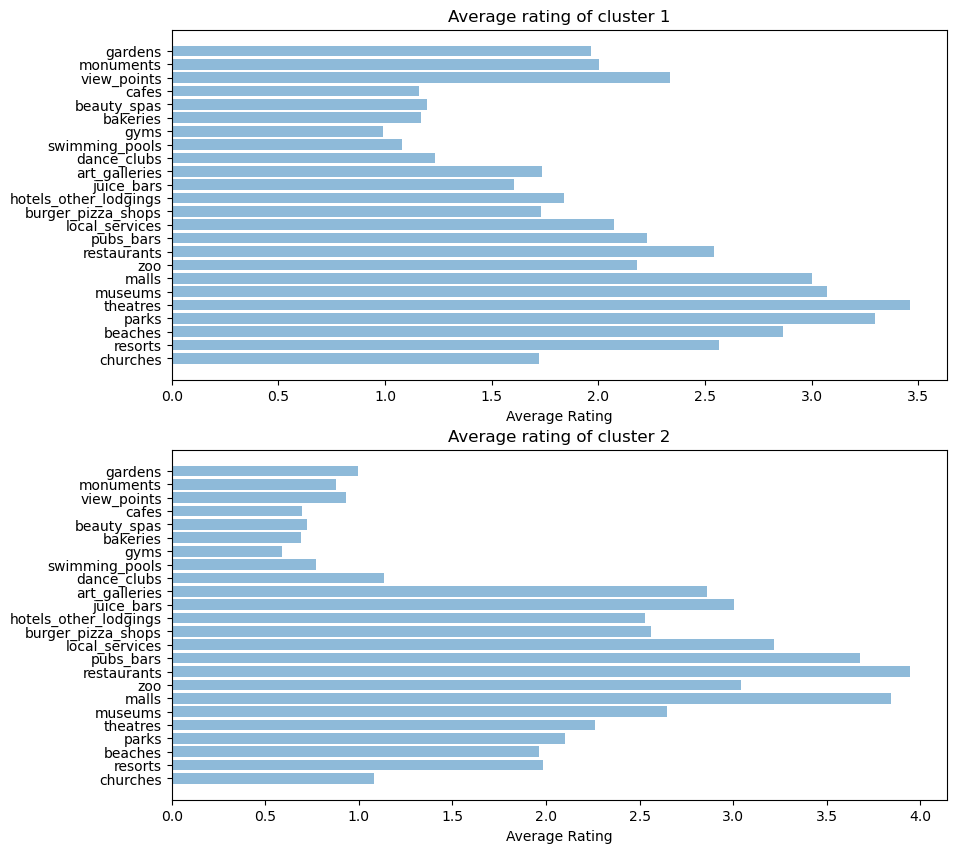

In [146]:
# Barplot
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.barh(np.arange(24), cluster_1.drop(['id', 'Cluster'],axis=1).mean(axis=0).values, align='center', alpha=0.5)
plt.yticks(np.arange(24), cluster_1.drop(['id', 'Cluster'],axis=1).mean(axis=0).index)
plt.xlabel('Average Rating')
plt.title('Average rating of cluster 1')

plt.subplot(2,1,2)
plt.barh(np.arange(24), cluster_2.drop(['id', 'Cluster'],axis=1).mean(axis=0).values, align='center', alpha=0.5)
plt.yticks(np.arange(24), cluster_2.drop(['id', 'Cluster'],axis=1).mean(axis=0).index)
plt.xlabel('Average Rating')
plt.title('Average rating of cluster 2')
plt.show()

In above barplot we can see clear difference between two clusters as positive and negative reviews.

Cluster 1 --------> Positive reviews

Cluster 1 --------> Negative reviews

**Conclusion**

By using heirarchical clustering we clustered review into two category, positive review and a negeative review